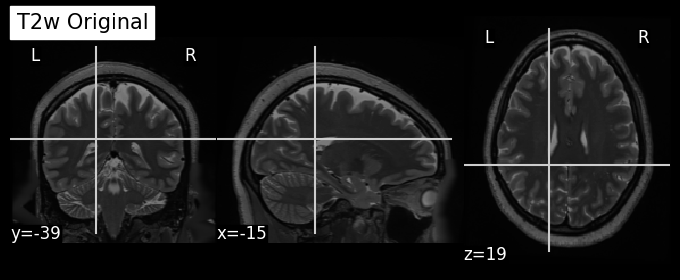

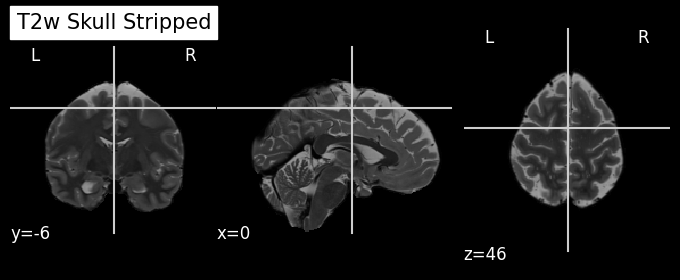

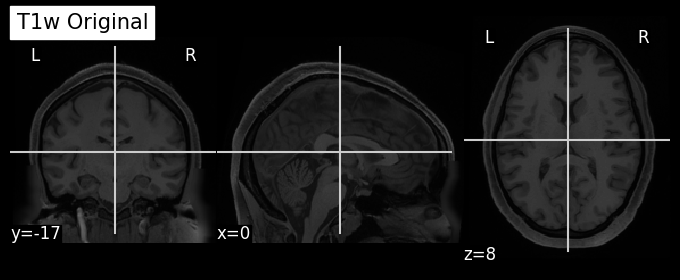

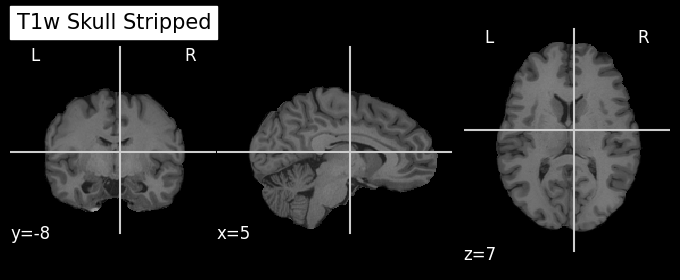

In [7]:
import os
import subprocess
import os
import shlex
import subprocess
import multiprocessing as mp
from nilearn import plotting
import matplotlib
import matplotlib.pyplot as plt
import nibabel as nib

root_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

def main():
    # Change the working directory to the "data" folder
    os.chdir('../data')

    # Get the list of patient folders
    patient_folders = [folder for folder in os.listdir() if os.path.isdir(folder) and folder.startswith('E')]

    # Create the "output" subfolder in each patient folder if it doesn't exist
    for patient_folder in patient_folders:
        output_path = os.path.join(patient_folder, 'output')
        if not os.path.exists(output_path):
            os.makedirs(output_path)

    # Define the input image filenames
    input_image_filenames = [
        'T2w_1mm_noalign.nii.gz',
        'T1w_1mm.nii.gz'
    ]
    
    # Run BET on each patient folder for each input image and save the output with the same name
    for patient_folder in patient_folders:
        for input_image_filename in input_image_filenames:
            input_image_path = os.path.join(patient_folder, input_image_filename)
            output_image_path = os.path.join(patient_folder, 'output', input_image_filename)

            command = f'bet "{input_image_path}" "{output_image_path}" -R -f 0.5 -g 0'
            subprocess.run(command, shell=True)

if __name__ == "__main__":
    main()

def display_image(image_file, title):
    """
    Display NIfTI image using nilearn.
    
    Args:
        image_file (str): Path to the NIfTI file.
        title (str): Title of the plot.
    """
    plotting.plot_anat(image_file, title=title, display_mode='ortho')
    plotting.show()

display_image(os.path.join(root_dir, 'data','E03', "T2w_1mm_noalign.nii.gz"), "T2w Original")
display_image(os.path.join(root_dir, 'data','E03', 'output', "T2w_1mm_noalign.nii.gz"), "T2w Skull Stripped")
display_image(os.path.join(root_dir, 'data','E03', "T1w_1mm.nii.gz"), "T1w Original")
display_image(os.path.join(root_dir, 'data','E03', 'output', "T1w_1mm.nii.gz"), "T1w Skull Stripped")
